# Predicting Species of the iris Flower

## Overview 
The iris dataset has three types of species of the iris flower. The dataset has the measurement of the sepal width, sepal length, petal width, and petal length. I am going to train my model to use the measurement to predict the type of species. In other words, I am going to give the model measurement of the sepal and petal and the model will predict the type of the iris flower. 

My objective for this project is to create a classification model that can assess the sepal and petal measurements and predict the iris flower type.

## Data or Dataset


The iris dataset for this project was obtain from sklearn Datesets. About 150 records of sepal and petal measurements are included in the collection. The features represtent the width and length of the sepal and petal. 

* link to the dataset: 
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris





## Date Improting and Cleaning 
I am going to import the libraries need for this project and then explore the data and remove duplicate if they are found. 

In [1]:
# Standard Imports
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data
from sklearn.datasets import load_iris 

# Models 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Evaluating the models libs
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

# Transformers (standardization)
from sklearn.preprocessing import StandardScaler


## Get the dataset




In [2]:
# Load the iris from sklearn
iris = load_iris()

# Sklearn expect to get the target and the resposes as separaet objects
# Convert the iris data object into dataframe
data = pd.DataFrame(iris['data'], columns= iris['feature_names'])

# attach the target column feature
data['target']= iris['target']

# show sample of the data in dataset (first five rows)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Studying the Dataset


In [3]:
# getting the basic information about the dataframe 
print(data.info())

print(end='\n\n')

# Checking if there is missing values
print(data.isna().sum())

# printing the features 
print ("The features are" , iris.feature_names)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64
The features are ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


#### Observation
* There are four columns or feature of the iris data sets. 
* There are 150 records. 
* There are no null values.
* The values are of type floats for all features or columns and int for the taget no strings. 



In [4]:
# See the stats of the data sets such the max and mean and teh max length and width
print(data.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


In [5]:
# count how many values  of each species 
data.target.value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

from the previous output and the sklearn doc, there are 50 of each species.
* 0 is the target value for setosa
* 1 is the target value for versicolor
* 2 is the target value for virginica

In [6]:
# breaking the data test

# training: 80 - 80 training
#               \20 validation
# testing(predicting): 20 
# in other words, there will be three dataset training, validating, and predicting. 

# features
x = data.drop('target', axis=1)
# target
y = data['target']

x_all, x_hold, y_all, y_hold =  train_test_split(x, y)
x_train, x_test, y_train, y_test =  train_test_split(x_all, y_all)

In [7]:
# Fit a scaler to a training data
scaler = StandardScaler()

# Fit on training data
scaler.fit(x_train)

# Tranfroming
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

Use three different algorithms from Scikit-Learn
Paragraph briefly explaining algorithm and another paragraph on results of each model


## Model1 - LogisticRegression


In [8]:

model1 = LogisticRegression(multi_class='auto').fit(x_train, y_train)



In [9]:
y_hat_test= model1.predict(x_test)
y_hat_train= model1.predict(x_train)

In [10]:
residuals = y_train == y_hat_train
print('Number of values correctly predicted:')
print(pd.Series(residuals).value_counts())

Number of values correctly predicted:
True     82
False     2
Name: target, dtype: int64


In [11]:
residuals = y_test == y_hat_test

print('Number of values correctly predicted: ')
print(pd.Series(residuals).value_counts())

Number of values correctly predicted: 
True     27
False     1
Name: target, dtype: int64


In [12]:
accuracy_score(y_test, y_hat_test)


0.9642857142857143

In [13]:
accuracy_score(y_train, y_hat_train)

0.9761904761904762

<Figure size 720x720 with 0 Axes>

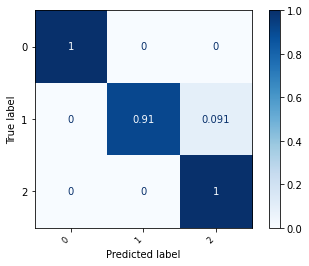

(<function sklearn.metrics._classification.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)>,
 <function sklearn.metrics._plot.confusion_matrix.plot_confusion_matrix(estimator, X, y_true, *, labels=None, sample_weight=None, normalize=None, display_labels=None, include_values=True, xticks_rotation='horizontal', values_format=None, cmap='viridis', ax=None, colorbar=True)>)

In [14]:
plt.figure(figsize =(10,10))
plot_confusion_matrix(model1, x_test, y_test,
                     cmap=plt.cm.Blues,normalize='true')

plt.xticks(rotation=45, horizontalalignment='right', fontsize='small')
plt.show()

confusion_matrix, plot_confusion_matrix,

### model2 - DecisionTreeClassifier



In [15]:
model2 = DecisionTreeClassifier(random_state=0).fit(x_train, y_train)
model2.predict(x_test)


array([2, 2, 0, 1, 1, 0, 2, 0, 1, 0, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 0,
       1, 2, 0, 1, 2, 0])

In [16]:
y_hat_test=model1.predict(x_test)
y_hat_train= model1.predict(x_train)

In [17]:
residuals = y_train == y_hat_train
print('Number of values correctly predicted:')
print(pd.Series(residuals).value_counts())

Number of values correctly predicted:
True     82
False     2
Name: target, dtype: int64


In [18]:
residuals = y_test == y_hat_test

print('Number of values correctly predicted: ')
print(pd.Series(residuals).value_counts())

Number of values correctly predicted: 
True     27
False     1
Name: target, dtype: int64


In [19]:
accuracy_score(y_test, y_hat_test)

0.9642857142857143

In [20]:
accuracy_score(y_train, y_hat_train)

0.9761904761904762

### model3 - KNeighborsClassifier






In [21]:
model3 = KNeighborsClassifier(n_neighbors=3).fit(x_train, y_train)
model3.predict(x_test)


array([1, 2, 0, 1, 1, 0, 2, 0, 1, 0, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 0,
       1, 2, 0, 1, 2, 0])

In [22]:
y_hat_test=model1.predict(x_test)
y_hat_train= model1.predict(x_train)

In [23]:
residuals = y_train == y_hat_train
print('Number of values correctly predicted:')
print(pd.Series(residuals).value_counts())

Number of values correctly predicted:
True     82
False     2
Name: target, dtype: int64


In [24]:
residuals = y_test == y_hat_test

print('Number of values correctly predicted: ')
print(pd.Series(residuals).value_counts())

Number of values correctly predicted: 
True     27
False     1
Name: target, dtype: int64


In [25]:
accuracy_score(y_test, y_hat_test)

0.9642857142857143

In [26]:
accuracy_score(y_train, y_hat_train)

0.9761904761904762

<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

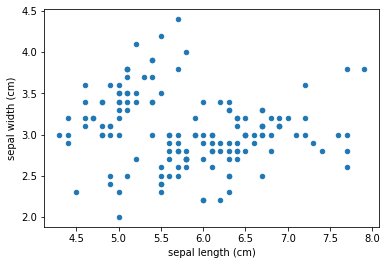

In [27]:
# We'll use this to make a scatterplot of the Iris features.
data.plot(kind="scatter", x="sepal length (cm)", y="sepal width (cm)")

In [28]:
https://towardsdatascience.com/the-iris-dataset-a-little-bit-of-history-and-biology-fb4812f5a7b5

SyntaxError: invalid syntax (<ipython-input-28-e65cd1d8d4a0>, line 1)